# MACHINE LEARNING PROJECT
--------
### Team: Jonathan Manzano & Henry Pham  
Dataset: Autism in children  

[link to Proj Description](https://sjsu.instructure.com/courses/1580083/files/76444276?module_item_id=15357781)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data="https://raw.githubusercontent.com/csbfx/cs133/main/autism_child.csv"
df = pd.read_csv(data, sep=',', na_values = '?')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,total_score,age_desc,relation,ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9,4-11 years,Parent,YES


## **Pt 1: Understanding our data**

In [22]:
df.info() #null values in age, ethnicity, and relation
indiv_scores = ["A1_Score",	"A2_Score",	"A3_Score",	"A4_Score",	"A5_Score",	"A6_Score",	"A7_Score",	"A8_Score",	"A9_Score",	"A10_Score"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         292 non-null    int64  
 1   A2_Score         292 non-null    int64  
 2   A3_Score         292 non-null    int64  
 3   A4_Score         292 non-null    int64  
 4   A5_Score         292 non-null    int64  
 5   A6_Score         292 non-null    int64  
 6   A7_Score         292 non-null    int64  
 7   A8_Score         292 non-null    int64  
 8   A9_Score         292 non-null    int64  
 9   A10_Score        292 non-null    int64  
 10  age              292 non-null    float64
 11  gender           292 non-null    object 
 12  ethnicity        292 non-null    object 
 13  jundice          292 non-null    object 
 14  austim           292 non-null    object 
 15  country_of_res   292 non-null    object 
 16  used_app_before  292 non-null    object 
 17  total_score     

Lets look at the columns that have null values

In [14]:
#looking at relation column to understand it better
df['relation'].value_counts(dropna=False)

# weird has to 2 self values
#this feature seems fairly useless, so I will either drop it or convert NaN to Parent

relation
Parent                      214
NaN                          43
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: count, dtype: int64

In [15]:
#looking at age column to understand it better
df['age'].value_counts(dropna=False)
# will just use the mdeian age to fill in the NaN values

age
4.0     92
5.0     45
6.0     39
7.0     27
11.0    26
8.0     21
9.0     20
10.0    18
NaN      4
Name: count, dtype: int64

In [16]:
#looking at ethnicity column to understand it better
df['ethnicity'].value_counts(dropna=False)
#honestly dont know what to do with NaN values, wil prolly figure it out later

ethnicity
White-European     108
Asian               46
NaN                 43
Middle Eastern      27
South Asian         21
Others              14
Black               14
Latino               8
Hispanic             7
Pasifika             2
Turkish              2
Name: count, dtype: int64

### Preprocessing the data

In [17]:
# Handling Missing Values
df['age'].fillna(df['age'].median(), inplace=True)
df['ethnicity'].fillna('Unknown', inplace=True)
df['relation'].fillna('Unknown', inplace=True)

# Encoding Categorical Variables
df_encoded = pd.get_dummies(df, columns=['gender', 'jundice', 'austim', 'country_of_res', 'used_app_before', 'age_desc', 'ASD'])

# Scaling Numerical Variables
scaler = StandardScaler()
numerical_cols = ['age', 'total_score']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded



C:\Users\Henry Pham\AppData\Local\Temp\ipykernel_35440\3554706266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_res_Turkey,country_of_res_U.S. Outlying Islands,country_of_res_United Arab Emirates,country_of_res_United Kingdom,country_of_res_United States,used_app_before_no,used_app_before_yes,age_desc_4-11 years,ASD_NO,ASD_YES
0,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,True,False,True,True,False
1,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,True,False,True,True,False
2,1,1,0,0,0,1,1,1,0,0,...,False,False,False,False,False,False,True,True,True,False
3,0,1,0,0,1,1,0,0,0,1,...,False,False,False,False,False,True,False,True,True,False
4,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,False,False,False,True,False,True,False,True,False,True
288,1,0,0,0,1,0,1,0,0,1,...,False,False,False,False,False,True,False,True,True,False
289,1,0,1,1,1,1,1,0,0,1,...,False,False,False,False,False,True,False,True,False,True
290,1,1,1,0,1,1,1,1,1,1,...,False,False,False,False,False,True,False,True,False,True


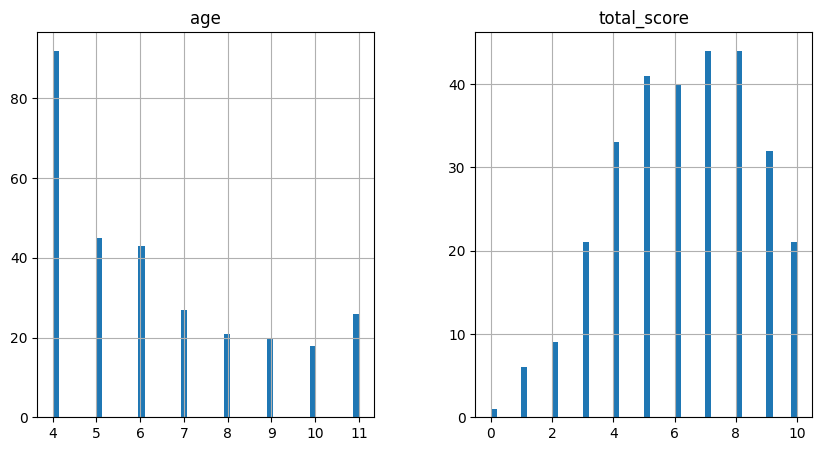

In [26]:
df.drop(indiv_scores, axis = 1).hist(bins=50, figsize=(10,5))
plt.show()

Text(0.5, 1.0, 'Pairplot of the Features')

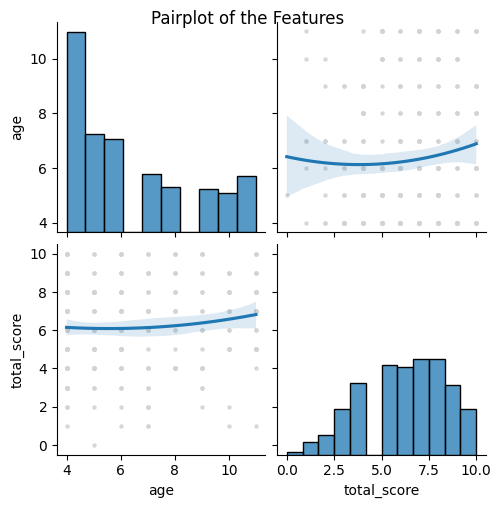

In [28]:
g = sns.pairplot(df.drop(indiv_scores, axis = 1), kind = 'reg', plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2});

g.figure.suptitle("Pairplot of the Features", y=1.0)

## Pt 1.5: Answering 5 Unique Questions

1. **Are there any correlations between the individual AQ-10 scores and the total score?** This question involves analyzing the relationships between each of the ten AQ-10 question scores (A1_Score to A10_Score) and the total score to see if certain questions are more indicative of autism traits than others.

2. **Does age or gender have an impact on the likelihood of being diagnosed with autism?** Investigate if there's a correlation between age, gender, and the presence of autism (ASD), and whether certain age groups or genders are more likely to have a diagnosis.

3. **Is there any relationship between family history of autism (austim) and the likelihood of being diagnosed with autism?** This question involves examining whether individuals with a family history of autism are more likely to have a diagnosis themselves, indicating a potential genetic component to autism.

4. **How does the use of a screening app (used_app_before) relate to the likelihood of being diagnosed with autism?** Explores whether individuals who have used a screening app before are more likely to be diagnosed with autism compared to those who haven't, which could indicate the effectiveness of such screening tools.

5. **Are there any differences in the distribution of autism diagnoses (ASD) across different countries (country_of_res)?** This question involves analyzing whether the prevalence of autism varies across different countries, which could provide insights into potential cultural or environmental factors influencing autism diagnoses.

### Pt 2: Creating the Training and Testing Sets